<a href="https://colab.research.google.com/github/atkinsonde/524/blob/main/Clustser_code_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
import numpy as np
import pandas as pd

list_of_files = glob.glob("*.txt")           # create the list of files

list_of_files.sort()

stn = []
year = []
month = []
day = []
Tval = []           
date = []

fn_total= 30 #len(list_of_files)
#variables = [0 for _ in range(fn_total)]

fn = 0

for file_name in list_of_files:
  fn=fn+1 # limit the files wa are reading in
  if fn < fn_total: #   if 1==1  The 1==1 is just an indentation place holder so I don't have to unindent everything
      FI = open(file_name, 'r')
      #print(fn, file_name)
      #print(FI)

      count=0    
      
      for line in FI:
          #print(line)
          #### THIS PART GRABS AND CLEANS A NICE STATION NAME 
          #### USE THIS AS THE NAME OF A VARIABLE THAT CONTAINS ONLY THAT STATION'S DATA
          count=count+1
          if count==1:
#              stn_name_raw=line[8:53]              
             stn_name_raw = line[8:30]
             comma2=stn_name_raw.find(",")
             stn_name=stn_name_raw[0:comma2]
             stn_name=stn_name.replace(" ","_")
             stn_name=stn_name.replace("'","_") # a couple of stn names have apostrophes that should be replaced
             stn_name=stn_name.replace(".","_")             
          
             for str_index in range(len(stn_name)-1,-1,-1): #this cleans up the station file names
                  if stn_name[str_index]!="_":
                      break
                  else:
                      stn_name=stn_name[0:str_index]
             print(stn_name)
             
                          
          if count > 4: #skip the first four lines of header informaiton
            #### THIS PART READS IN THE MONTHLY VALUES
              
            yr = line[1:5]              
            
            dy=1
            for mo in range(1,13):              
                start = 6 + ((mo-1) * 11)
                end = start+8
                val = line[start:end]
              
                if float(val) < -100:
                     break
                 
                stn.append(stn_name)
                year.append(yr)
                month.append(mo)
                day.append(dy)
                Tval.append(float(val))            
                date.append(str(yr)+":"+str(mo)+":"+str(dy))
      FI.close()

                
big_set = pd.DataFrame(
        {'station': stn,
       'year': year,
       'month': month,
       'day': day,
       'Tval': Tval,
       'date':date
       })


big_set['date'] = pd.to_datetime(big_set['date'],
       format='%Y:%m:%d')    


SHAWNIGAN_LAKE
VICTORIA
BLIND_CHANNEL
COMOX
PORT_HARDY
QUINSAM_RIVER
CAPE_SCOTT
ESTEVAN_POINT
QUATSINO
CAPE_ST_JAMES
LANGARA
SANDSPIT
BELLA_COOLA
MCINNES_ISLAND
PRINCE_RUPERT
STEWART
TERRACE
SMITHERS
WISTARIA
TATLAYOKO_LAKE
BARKERVILLE
FORT_ST_JAMES
PRINCE_GEORGE
QUESNEL
WILLIAMS_LAKE
AGASSIZ
VANCOUVER
KELOWNA
MERRITT


In [2]:
Station_timings = big_set.groupby(["date","station"]).size() \
          .unstack(level = 'station' , fill_value = 0) 

#This gives us a count of whether a station existed at a given time
Station_timings = big_set.groupby(["date", "station"]) \
          .size().unstack(level = 1, fill_value = 0) 


tvals = big_set[['date','station','Tval']]
tvals_cols = tvals.groupby(["date", "station"]).max().unstack(level=1) 
    # max is a filler function here, to pull out the value. I'm sure there is a better way to do it!

#subset by date
tvals_cols_date = tvals_cols.loc['1980-1-1':'1985-1-1']

tvals_cols_date_T = tvals_cols_date.transpose()

#throw out any rows that have NaNs in them
tvals_cols_date_x = tvals_cols_date_T.dropna(axis=0,how='any')


In [3]:
tvals_cols = tvals.groupby(["date", "station"]).max().unstack(level=1) 

In [4]:
tvals_cols_date_x

date                 1980-01-01  1980-02-01  1980-03-01  1980-04-01  \
     station                                                          
Tval AGASSIZ               -0.4         5.4         5.8        11.3   
     BLIND_CHANNEL          1.2         4.6         4.9         8.9   
     CAPE_SCOTT             2.6         5.9         5.4         7.8   
     CAPE_ST_JAMES          3.3         6.3         5.8         7.4   
     COMOX                  0.9         4.7         5.4         9.2   
     ESTEVAN_POINT          3.0         6.5         6.0         8.4   
     FORT_ST_JAMES        -16.8        -6.9        -4.0         5.3   
     KELOWNA               -7.3        -0.3         3.3         9.7   
     LANGARA                1.8         5.3         4.6         6.7   
     MERRITT               -8.3        -0.5         2.8         9.5   
     PORT_HARDY             1.2         5.6         5.0         8.0   
     PRINCE_GEORGE        -12.9        -4.0        -2.0         7.2   
     PRINCE_RUPERT         -0.7         4.2         3.5         7.1   
     QUATSINO               1.1         4.9         5.4         8.2   
     QUESNEL              -12.0        -3.4        -0.5         8.0   
     QUINSAM_RIVER         -0.6         3.1         4.4         8.6   
     SANDSPIT               1.5         5.2         4.9         6.9   
     SHAWNIGAN_LAKE        -0.3         4.0         5.0         9.2   
     SMITHERS             -12.3        -3.3        -0.6         6.2   
     STEWART               -6.4         0.2         1.4         6.3   
     TATLAYOKO_LAKE       -10.8        -3.5        -0.5         6.0   
     TERRACE               -7.3         0.3         1.8         6.4   
     VANCOUVER              0.7         5.7         5.7        10.1   
     VICTORIA               1.1         5.5         5.9         9.8   
     WILLIAMS_LAKE        -11.3        -4.2        -2.3         7.3   
     WISTARIA             -14.6        -6.2        -3.1         3.8   

date                 1980-05-01  1980-06-01  1980-07-01  1980-08-01  \
     station                                                          
Tval AGASSIZ               13.0        14.5        17.5        16.8   
     BLIND_CHANNEL         11.7        13.5        15.3        15.2   
     CAPE_SCOTT             9.4        11.7        13.5        12.9   
     CAPE_ST_JAMES          9.3        11.9        13.4        13.8   
     COMOX                 12.7        14.4        17.0        16.6   
     ESTEVAN_POINT         10.4        12.1        14.0        13.0   
     FORT_ST_JAMES         10.1        13.8        14.5        13.1   
     KELOWNA               13.6        15.2        18.0        16.3   
     LANGARA                8.1        10.5        12.9        12.8   
     MERRITT               13.1        14.4        17.7        15.8   
     PORT_HARDY            10.1        12.5        13.7        13.4   
     PRINCE_GEORGE         10.8        13.6        14.3        12.8   
     PRINCE_RUPERT          9.1        12.0        13.5        12.8   
     QUATSINO              10.7        13.0        14.7        14.0   
     QUESNEL               12.4        14.7        15.4        14.4   
     QUINSAM_RIVER         12.1        13.9        16.3        15.7   
     SANDSPIT               9.5        13.0        14.8        15.5   
     SHAWNIGAN_LAKE        11.9        13.3        16.7        16.0   
     SMITHERS              10.6        14.7        14.4        13.4   
     STEWART               11.5        15.3        14.0        14.0   
     TATLAYOKO_LAKE         9.4        11.8        12.7        11.6   
     TERRACE               11.7        16.4        15.1        15.6   
     VANCOUVER             12.3        14.2        16.6        16.4   
     VICTORIA              11.6        13.4        15.6        15.4   
     WILLIAMS_LAKE         10.9        12.3        14.4        12.6   
     WISTARIA               7.9        12.7        13.2        12.7   

date                 1

In [5]:
big_set

,station,year,month,day,Tval,date
0,SHAWNIGAN_LAKE,1914,1,1,3.1,1914-01-01
1,SHAWNIGAN_LAKE,1914,2,1,3.6,1914-02-01
2,SHAWNIGAN_LAKE,1914,3,1,6.8,1914-03-01
3,SHAWNIGAN_LAKE,1914,4,1,9.6,1914-04-01
4,SHAWNIGAN_LAKE,1914,5,1,13.3,1914-05-01
...,...,...,...,...,...,...
30753,MERRITT,2016,8,1,19.6,2016-08-01
30754,MERRITT,2016,9,1,13.6,2016-09-01
30755,MERRITT,2016,10,1,7.7,2016-10-01
30756,MERRITT,2016,11,1,5.5,2016-11-01


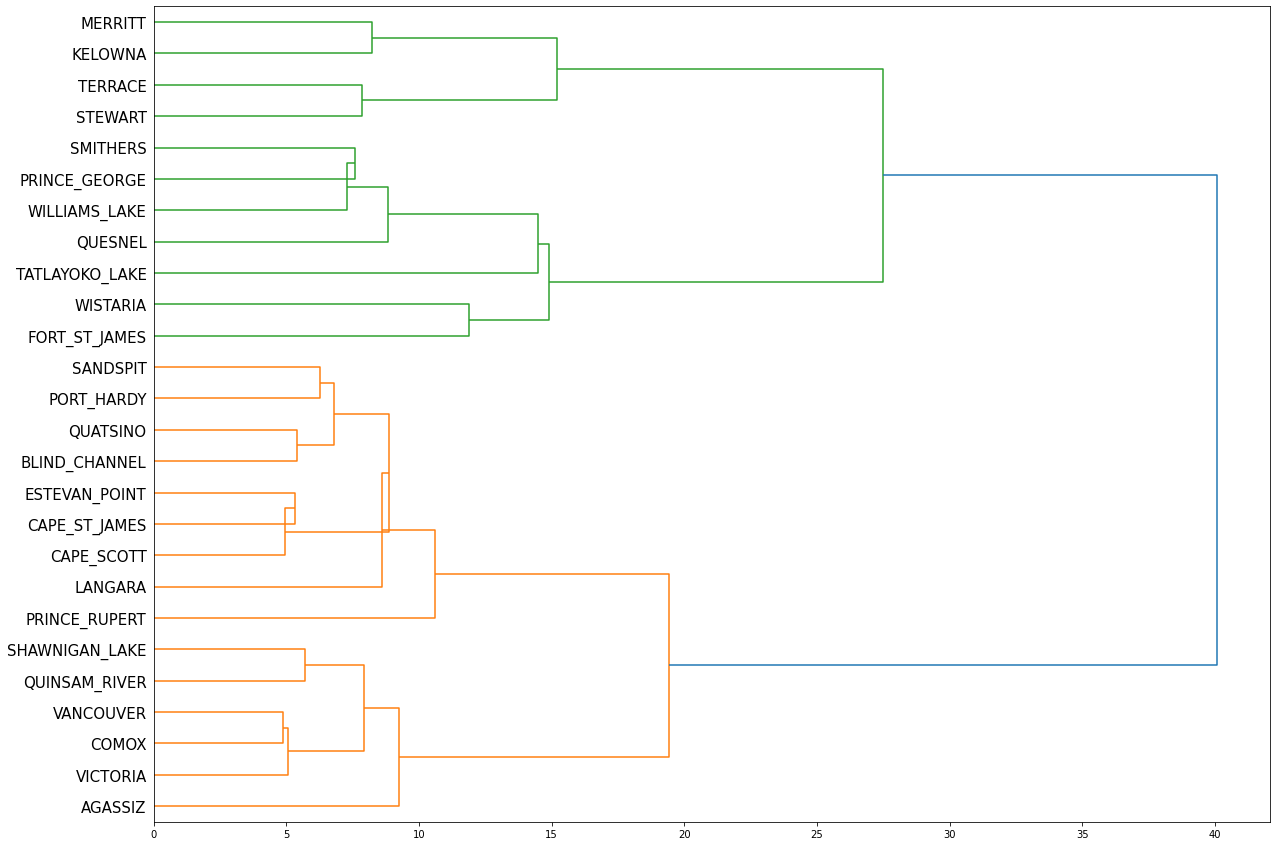

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as hac

Z = linkage(tvals_cols_date_x, method='median')

finstn = tvals_cols_date_x.reset_index()
stns = finstn['station']

labelList = [stns[i] for i in range(0, len(stns))]

plt.figure(figsize=(20, 15))
#plt.title('Hierarchical Clustering Dendrogram')
#plt.xlabel('sample index')
#plt.ylabel('distance')

dendrogram(
    Z,
    orientation='right',
    labels=labelList,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()


In [ ]:
stns

0            AGASSIZ
1      BLIND_CHANNEL
2         CAPE_SCOTT
3      CAPE_ST_JAMES
4              COMOX
5      ESTEVAN_POINT
6      FORT_ST_JAMES
7            KELOWNA
8            LANGARA
9            MERRITT
10        PORT_HARDY
11     PRINCE_GEORGE
12     PRINCE_RUPERT
13          QUATSINO
14           QUESNEL
15     QUINSAM_RIVER
16          SANDSPIT
17    SHAWNIGAN_LAKE
18          SMITHERS
19           STEWART
20    TATLAYOKO_LAKE
21           TERRACE
22         VANCOUVER
23          VICTORIA
24     WILLIAMS_LAKE
25          WISTARIA
Name: station, dtype: object

In [ ]:
############ MAPPING 
## Extract stations to plot
station_metadata = pd.read_csv(r"Homo_station_metadata.csv")           # create the list of file

#make station names identical to the data station names
station_metadata['station'] = station_metadata['station'].str.replace(' ', '_')
station_metadata['station'] = station_metadata['station'].str.replace("'", '_')
station_metadata['station'] = station_metadata['station'].str.replace(".", '_')


# need a file that merges lat lon and category by stn_name
num_clust1 = 7
part1 = hac.fcluster(Z, num_clust1, 'maxclust')


plot_set = pd.DataFrame(
        {'station': stns,
         'cluster': part1,
       })

plot_set= plot_set.join(station_metadata.set_index('station'), on='station')    


import plotly

df=plot_set
data = [ dict(
        type = 'scattergeo',
        lon = df['lon'],
        lat = df['lat'],
        text = df['station'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            colorscale='Rainbow',
            #autocolorscale = True,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            cmin = 1,
            color = df['cluster'],
            cmax = df['cluster'].max(),                    
            colorbar=dict(
                title="Clusters"
            )
        ))]


layout = dict(
        title = 'Median method results, 7 clusters retained',
        colorbar = True,
        geo = dict(
            scope='north america', # this didn't seem to work
            resolution=50, # improve coastline detail
            projection=dict( type='conic conformal', rotation=dict(lon=-100) ), # this doesn't appear to work
 #           projection=dict( type='mercator'), 
            showland = True,
            lonaxis = dict( range= [ -140.0, -45.0 ] ),
            lataxis = dict( range= [ 40.0, 85.0 ] ),
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(117, 117, 117)",
            countrycolor = "rgb(17, 17, 17)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )


fig = dict( data=data, layout=layout )
plotly.offline.plot(fig, validate=False, filename=r'Median_7.html')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



'Median_7.html'

In [ ]:
plot_set 

,station,cluster
0,AGASSIZ,1
1,BLIND_CHANNEL,2
2,CAPE_SCOTT,2
3,CAPE_ST_JAMES,2
4,COMOX,1
5,ESTEVAN_POINT,2
6,FORT_ST_JAMES,3
7,KELOWNA,7
8,LANGARA,2
9,MERRITT,7
